In [4]:
#importing library
import numpy as np
import pandas as pd
pd.set_option('max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [5]:
#loading the dataset
df=pd.read_csv('../input/disease-prediction-using-machine-learning/Training.csv')
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [6]:
#Preprocessing the dataset
#checking for missing values
df.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [15]:
def preprocess_inputs(df):
    df=df.copy()
    df=df.drop('Unnamed: 133',axis=1)
    #Splitting the dataset into x and y
    y=df['prognosis']
    x=df.drop('prognosis',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)
    return x_train,x_test,y_train,y_test

In [17]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)

(3444, 132)
(1476, 132)


In [18]:
#checking for values counts
y_train.value_counts

<bound method IndexOpsMixin.value_counts of 1250                       GERD
2668        Chronic cholestasis
3113    Urinary tract infection
4057                  Psoriasis
2115                       AIDS
                 ...           
2895               Tuberculosis
2763                Chicken pox
905             Gastroenteritis
3980        Chronic cholestasis
235                 Hepatitis E
Name: prognosis, Length: 3444, dtype: object>

In [22]:
#training the model
model=LogisticRegression()
model.fit(x_train,y_train)
#getting the accuracy score
print("Test Accuracy{:2f}".format(model.score(x_test,y_test)))

Test Accuracy1.000000


In [25]:
#Feature Selection
coefficient=np.mean(model.coef_,axis=0)
print(coefficient)

[-1.70866031e-15  5.03662153e-16  2.54115834e-16  2.24033190e-16
  2.69939897e-17  1.06622028e-15  1.08314441e-16 -1.04548822e-15
 -3.83966233e-16 -2.46584596e-16 -1.28581089e-16 -1.28894185e-15
 -7.05651662e-16 -7.23908569e-16 -3.73684823e-16  4.36780101e-16
 -7.19582337e-16  4.39963953e-16  5.83036329e-16 -1.03880319e-15
 -8.24628306e-17  1.39285602e-16 -5.91498395e-17 -2.67052217e-16
 -3.15635052e-16 -9.55874946e-16  3.69623031e-16 -1.71949176e-16
 -5.04339118e-16  2.79755893e-16 -1.11868509e-16  6.68841676e-16
 -1.57326726e-15 -1.74657037e-15 -2.32876049e-16  2.05797439e-16
  7.54985505e-16  8.43160230e-16  6.43116996e-17 -1.62471662e-15
  5.95729428e-17 -1.51640218e-16 -1.04083409e-16 -7.31122480e-16
 -2.81956030e-16  0.00000000e+00  2.27798810e-16  3.15465811e-16
  9.61967633e-16 -1.01637872e-15  3.16396638e-16  1.49524702e-16
  1.49524702e-16  1.49524702e-16  1.49524702e-16  1.49524702e-16
 -7.64970743e-17  1.38227844e-16  1.83838378e-16 -8.48322090e-17
 -7.00659043e-17 -6.41001

In [57]:
#plotting figures
fig=px.bar(
    x=coefficient,
    y=x_train.columns,
    orientation='h',
    color=coefficient
   
    
)
fig.add_vline(x=importance_threshold,line_color='yellow')
fig.add_vline(x=-importance_threshold,line_color='yellow')
fig.add_vrect(x0=importance_threshold,x1=importance_threshold,line_width=0,fillcolor='yellow',opacity=0.2)
fig.show()

In [53]:
importance_threshold=np.quantile(np.abs(coefficient),q=0.25)

 ****Any features whose average weight values lie within the yellow box will be removed

In [60]:
low_importance_features=x_train.columns[np.abs(coefficient<importance_threshold)]

In [61]:
low_importance_features

Index(['itching', 'shivering', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
       'spotting_ urination', 'fatigue', 'anxiety', 'weight_loss',
       'restlessness', 'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'breathlessness', 'sweating', 'indigestion',
       'yellowish_skin', 'dark_urine', 'nausea', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine',
       'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
       'blurred_and_distorted_vision', 'chest_pain',
       'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
       'irritation_in_anus', 'excessive_hunger', 'extra_marital_contacts',
       'drying_and_tingling_lips', 'slurred_speech', 'knee_pain',
       'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
       'movement_stiffness', 'weakness_of_one_body_side', 'bladder_discomfort',
       

# Training (Reduced Data)

In [64]:
reduced_df=df.drop(low_importance_features,axis=1).copy()
x_train,x_test,y_train,y_test=preprocess_inputs(reduced_df)

In [66]:
#training the model
reduced_data_model=LogisticRegression()
reduced_data_model.fit(x_train,y_train)
print("Test Accuracy {:2f}".format(reduced_data_model.score(x_test,y_test)))

Test Accuracy 0.700542


In [ ]:
Confusion Matrix

y_pred=redued_data_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [69]:
#creating confusion matrx
y_pred=reduced_data_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

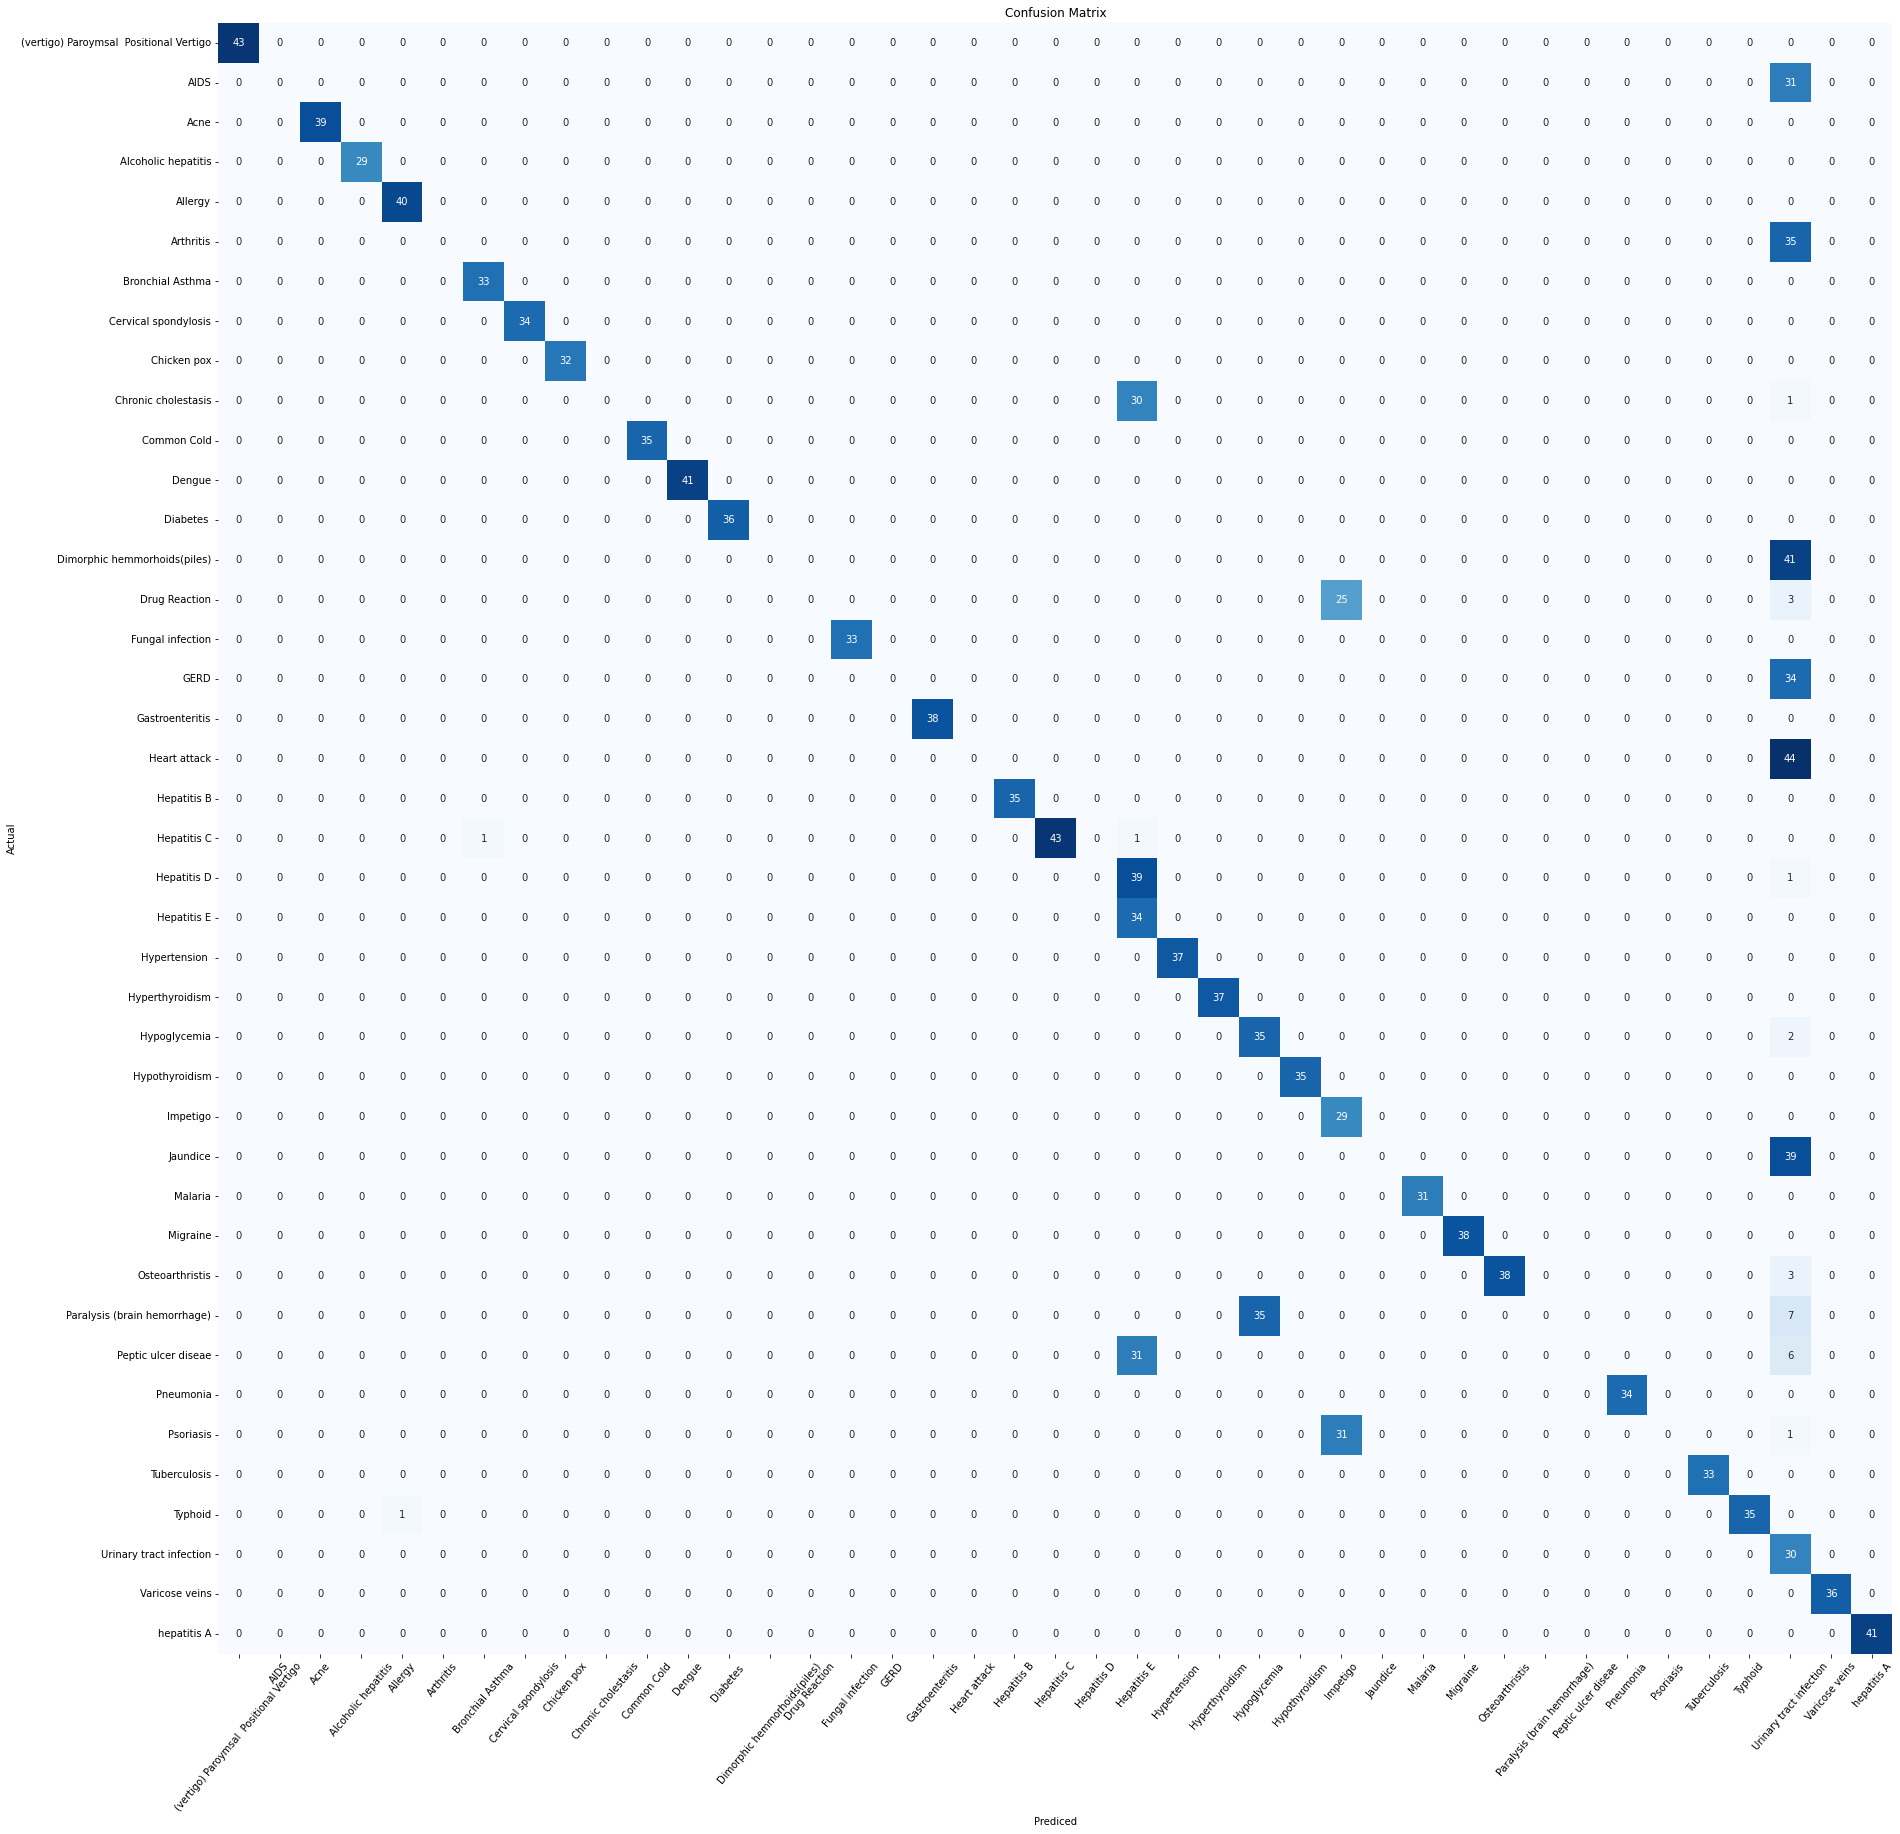

In [72]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues',cbar=False)
plt.xticks(np.arange(41)+0.5,reduced_data_model.classes_,rotation=50)
plt.yticks(np.arange(41)+0.5,reduced_data_model.classes_,rotation=0)
plt.xlabel('Prediced')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()